In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lb
from tqdm import tqdm
import IPython.display as ipd

In [3]:
df = pd.read_csv('metadata/UrbanSound8K.csv')

In [4]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [5]:
obj = df[df['class']=='jackhammer'][['slice_file_name','fold']].iloc[0]

In [6]:
data, sr = lb.load('audio/fold'+str(obj[1]) + '/'+obj[0])

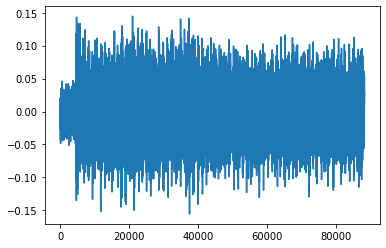

In [7]:
plt.plot(data)

In [8]:
ipd.Audio(data,rate=sr)

In [10]:
def path(file_name):
    excerpt = df[df['slice_file_name']==file_name]
    path_name = 'audio/'+'fold'+str(excerpt['fold'].iloc[0])+'/'+file_name
    class_name = excerpt['classID'].values[0]
    # print(path_name)
    
    return path_name,class_name
    

In [11]:
dataset = np.zeros((df.shape[0],2),dtype=object)               # creating the dataset for columns1:-data and column2:- class

In [12]:
dataset.shape

(8732, 2)

In [13]:
for x in tqdm(range(0,df.shape[0])):
    
    file_name = df.iloc[x]['slice_file_name']
    path_name,class_id = path(file_name)
    
    #applying the melspectogram features on the file name
    
    data, sr = lb.load(path=path_name,sr=22050,res_type='kaiser_fast')
    
    melspec = lb.feature.melspectrogram(y=data,sr=sr)
    melspec = np.mean(melspec.T,axis=0)
    
    dataset[x,0] = melspec
    dataset[x,1] = class_id
    
    

100%|██████████| 8732/8732 [42:07<00:00,  3.46it/s]  


In [16]:
np.save('melspectogram_dataset',dataset,allow_pickle=True)

In [14]:
ls=[]
for x in range(dataset.shape[0]):
    ls.append(dataset[x,0].shape)

In [15]:
print('Max:  ',max(ls) )
print('Min:  ',min(ls)) 

Max:   (128,)
Min:   (128,)
